# **Recency: <br>Age Distribution of Documents in an Enterprise Corpus**


* [Introduction](#Introduction)
* [ES: Document Age Distribution](#ESdistribution)
* [WS: Website Age Distribution](#WSdistribution)
* [Comparion/Discussion](#Discussion)
* [References](#References)

# **Introduction**  <a class="anchor"  id="Introduction"></a>
For search queries where current information is essential, prioritizing recent documents enhances the usefulness of search results.

In the Web Search (WS) context, the timeliness of information is often critical to user satisfaction. Examples of time-critical documents for rapidly evolving topics include breaking news, financial data, or event announcements, etc.    In the context of Enterprise Search (ES), users generally do not require or expect this level of immediacy.  Nonetheless, a document that was updated this year is likely to be more useful for users than one (with the same similarity matching score) that was updated twenty-five years ago.  

Two plots are produced: -
1.  The first is for ES and plots document count versus document age.
2.  The second plot is for WS and plots website count versus website age,


# **ES: Document age distrubution** <a class="anchor" id="ESdistribution"></a>
A search demand curve is a graphical representation that illustrates the volume of search queries related to a keyword or set of query terms over time.
Enterprise Search (ES) can be simply defined as finding the information needed from within an 

Apache Solr has a built-in `recip' time decay function, wherein the ranking score of a document decreases as it ages. This ensures newer documents are emphasized, while older documents remain accessible based on query-document term relevance matching.  For this function to work, the publication timestamp of documents must be recorded and indexed.  The Figure below plots the number of documents versus document age in the University's ES index.


In [1]:
# Python 3 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


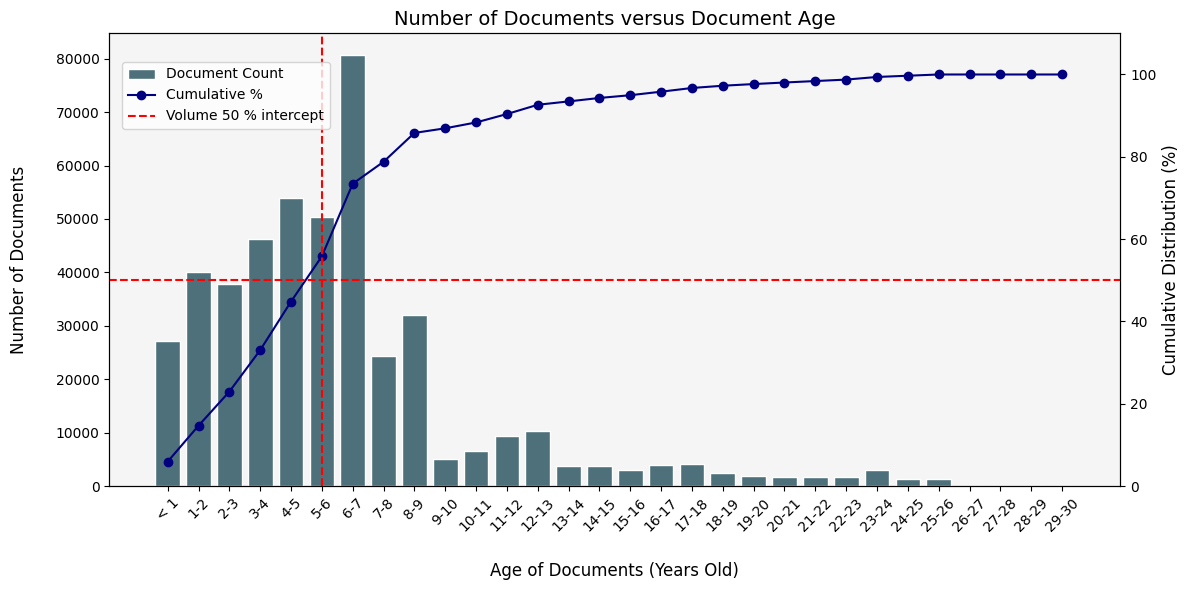

In [2]:
# ES Data for years and the number of documents 
# This data was extracted from a University ES  solr index

years = [ 
    "< 1", "1-2", "2-3", "3-4", "4-5", "5-6",
    "6-7", "7-8", "8-9", "9-10", "10-11", "11-12",
    "12-13", "13-14", "14-15", "15-16", "16-17", "17-18",
    "18-19", "19-20", "20-21", "21-22", "22-23", "23-24",
    "24-25", "25-26", "26-27", "27-28", "28-29", "29-30"
]  

num_documents = [
27145,39985,37880,46177,54001,50315,
80708,24434,32075,5153,6504,9357,
10299,3737,3845,3062,3909,4118,
2514,1851,1728,1629,1603,2938,
1381,1365,0,1,1,0
]




# Calculate cumulative distribution
cumulative_distribution = np.cumsum(num_documents)

# Normalize for percentage distribution
cumulative_distribution_percentage = (cumulative_distribution / cumulative_distribution[-1]) * 100

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for document count
color1 = '#4E707A'
ax1.bar(years, num_documents, color=color1, edgecolor='white', label='Document Count')
ax1.set_xlabel('Age of Documents (Years Old)', fontsize=12, labelpad=20)
ax1.set_ylabel('Number of Documents', fontsize=12, labelpad=20)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_title('Number of Documents versus Document Age', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.set_facecolor('whitesmoke')


# Cumulative distribution line plot
color2 = '#919191'
ax2 = ax1.twinx()
ax2.plot(years, cumulative_distribution_percentage, color='navy', marker='o', label='Cumulative %')
ax2.set_ylabel('Cumulative Distribution (%)', fontsize=12)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_ylim(0, 110)


# Find the n% intercept volume and year
n_percent_volume = 50
intercept_index_n = np.argmax(cumulative_distribution_percentage >= n_percent_volume)
intercept_year_n = years[intercept_index_n]
intercept_volume_n = cumulative_distribution[intercept_index_n]

# Add the n% intercept line
ax2.axhline(y=n_percent_volume, color='red', linestyle='--', label=f"Volume {n_percent_volume} % intercept")
ax2.axvline(x=intercept_year_n, color='red', linestyle='--')
ax1.annotate(f"",
             xy=(intercept_year_n, n_percent_volume), xycoords='data',
             #xytext=(intercept_year_n, n_percent_volume + 10),
             arrowprops=dict(arrowstyle="->", color='black'),
             fontsize=10, color='black')


# Add legends for clarity
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Tight layout and show the plot
plt.tight_layout()

plt.savefig('Fig-Document-Recency-Inventory.png', bbox_inches='tight')  
plt.show()


# **WS: Website age distrubution** <a class="anchor" id="WSdistribution"></a>
A search demand curve is a graphical representation that illustrates the volume of search queries related to a keyword or set of query terms over time.
Enterprise Search (ES) can be simply defined as finding the information needed from within an 


Figure shows that about 80% of all Websites on the internet were created over the past five years.   This is in contrast to the University's index, which shows that about % were created in the past five years.

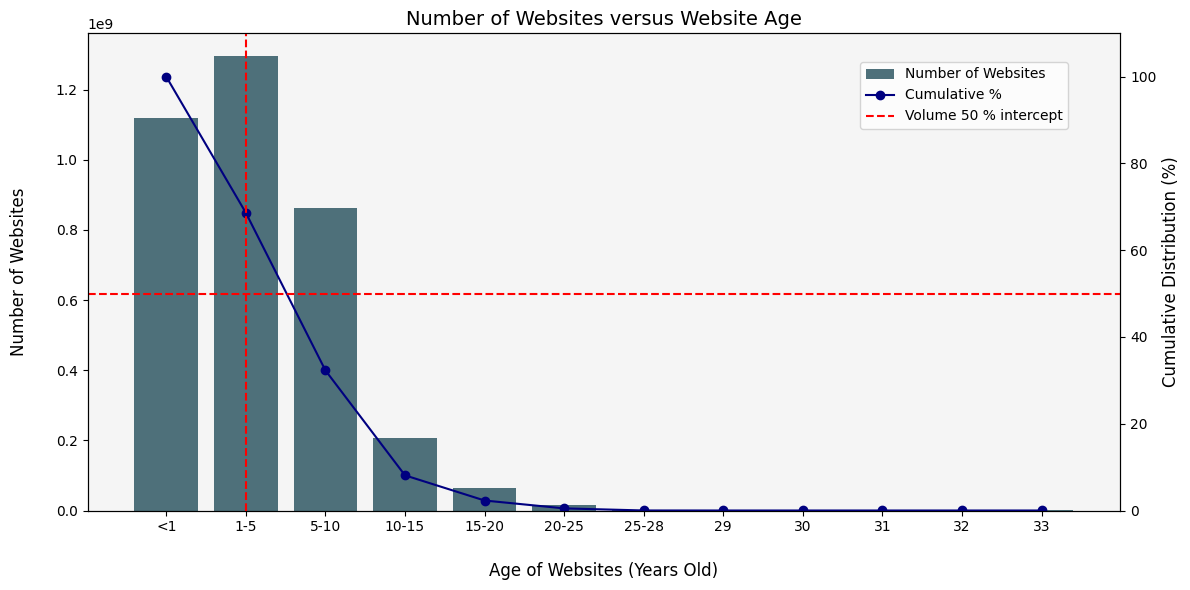

In [3]:
# WS Data for years and the number of websites
# This data is from https://explodingtopics.com/blog/how-many-websites-on-the-internet

years = [
    "33", "32", "31", "30", "29", 
    "25-28", "20-25", "15-20", "10-15", 
    "5-10", "1-5", "<1"
]
num_websites = [
    1, 10, 130, 2738, 23500, 
    257601, 17087182, 64780617, 206956723, 
    863105652, 1295973827, 1119023272
]

# Calculate cumulative distribution
cumulative_distribution = np.cumsum(num_websites)

# Normalize for percentage distribution
cumulative_distribution_percentage = (cumulative_distribution / cumulative_distribution[-1]) * 100

# Find the n% intercept volume and year
n_percent_volume = 50
intercept_index_n = np.argmax(cumulative_distribution_percentage >= n_percent_volume)
intercept_year_n = years[intercept_index_n]
intercept_volume_n = cumulative_distribution[intercept_index_n]

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of websites
colour1 = '#4E707A'
ax1.bar(years, num_websites, color=colour1, label='Number of Websites')
ax1.set_xlabel('Age of Websites (Years Old)', fontsize=12, labelpad=20)
ax1.set_ylabel('Number of Websites', fontsize=12, labelpad=20)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_title('Number of Websites versus Website Age', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.invert_xaxis()  # Reverse the order of the x-axis
ax1.set_facecolor('whitesmoke')

# Cumulative distribution line plot
ax2 = ax1.twinx()
ax2.plot(years, cumulative_distribution_percentage, color='navy', marker='o', label='Cumulative %')
ax2.set_ylabel('Cumulative Distribution (%)', fontsize=12)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_ylim(0, 110)

# Add the n% intercept line
ax2.axhline(y=n_percent_volume, color='red', linestyle='--', label=f"Volume {n_percent_volume} % intercept")
ax2.axvline(x=intercept_year_n, color='red', linestyle='--')
ax1.annotate(f"",
             xy=(intercept_year_n, n_percent_volume), xycoords='data',
             #xytext=(intercept_year_n, n_percent_volume + 10),
             arrowprops=dict(arrowstyle="->", color='black'),
             fontsize=10, color='black')

# Add legends for clarity
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), fontsize=10)

# Tight layout and show the plot
plt.tight_layout()
plt.show()



 # **Comparison/Discussion** <a class="anchor"  id="Discussion"></a>

**Similarity**
In the ES document distribution plot, we see that about 50\% of all documents in the corpus (solr index) are have been created or modified in the last five years. The volumne intercept is represented by the red dashed line. Similarly, the WS website distribution plot, 50\% of all websites have been created in the past five years.

**Difference**
But that is where the similarity ends.  The cumulative distribution takes a very different shape in both plots.  The cumulative distrubtion is represented by the navy line in the plots.  For ES, we see that the document creation (or modifcation) timestamps increase a

 # **References** <a class="anchor"  id="References"></a>

https://digital.csic.es/bitstream/10261/366936/1/How_old_is_web.pdf

https://explodingtopics.com/blog/how-many-websites-on-the-internetdown